In [5]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

df = pd.read_excel('all_label.xlsx', header=None)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90 non-null     float64
 1   1       90 non-null     float64
 2   2       90 non-null     float64
 3   3       90 non-null     float64
 4   4       90 non-null     float64
 5   5       90 non-null     float64
 6   6       90 non-null     float64
 7   7       90 non-null     float64
 8   8       90 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 6.5 KB


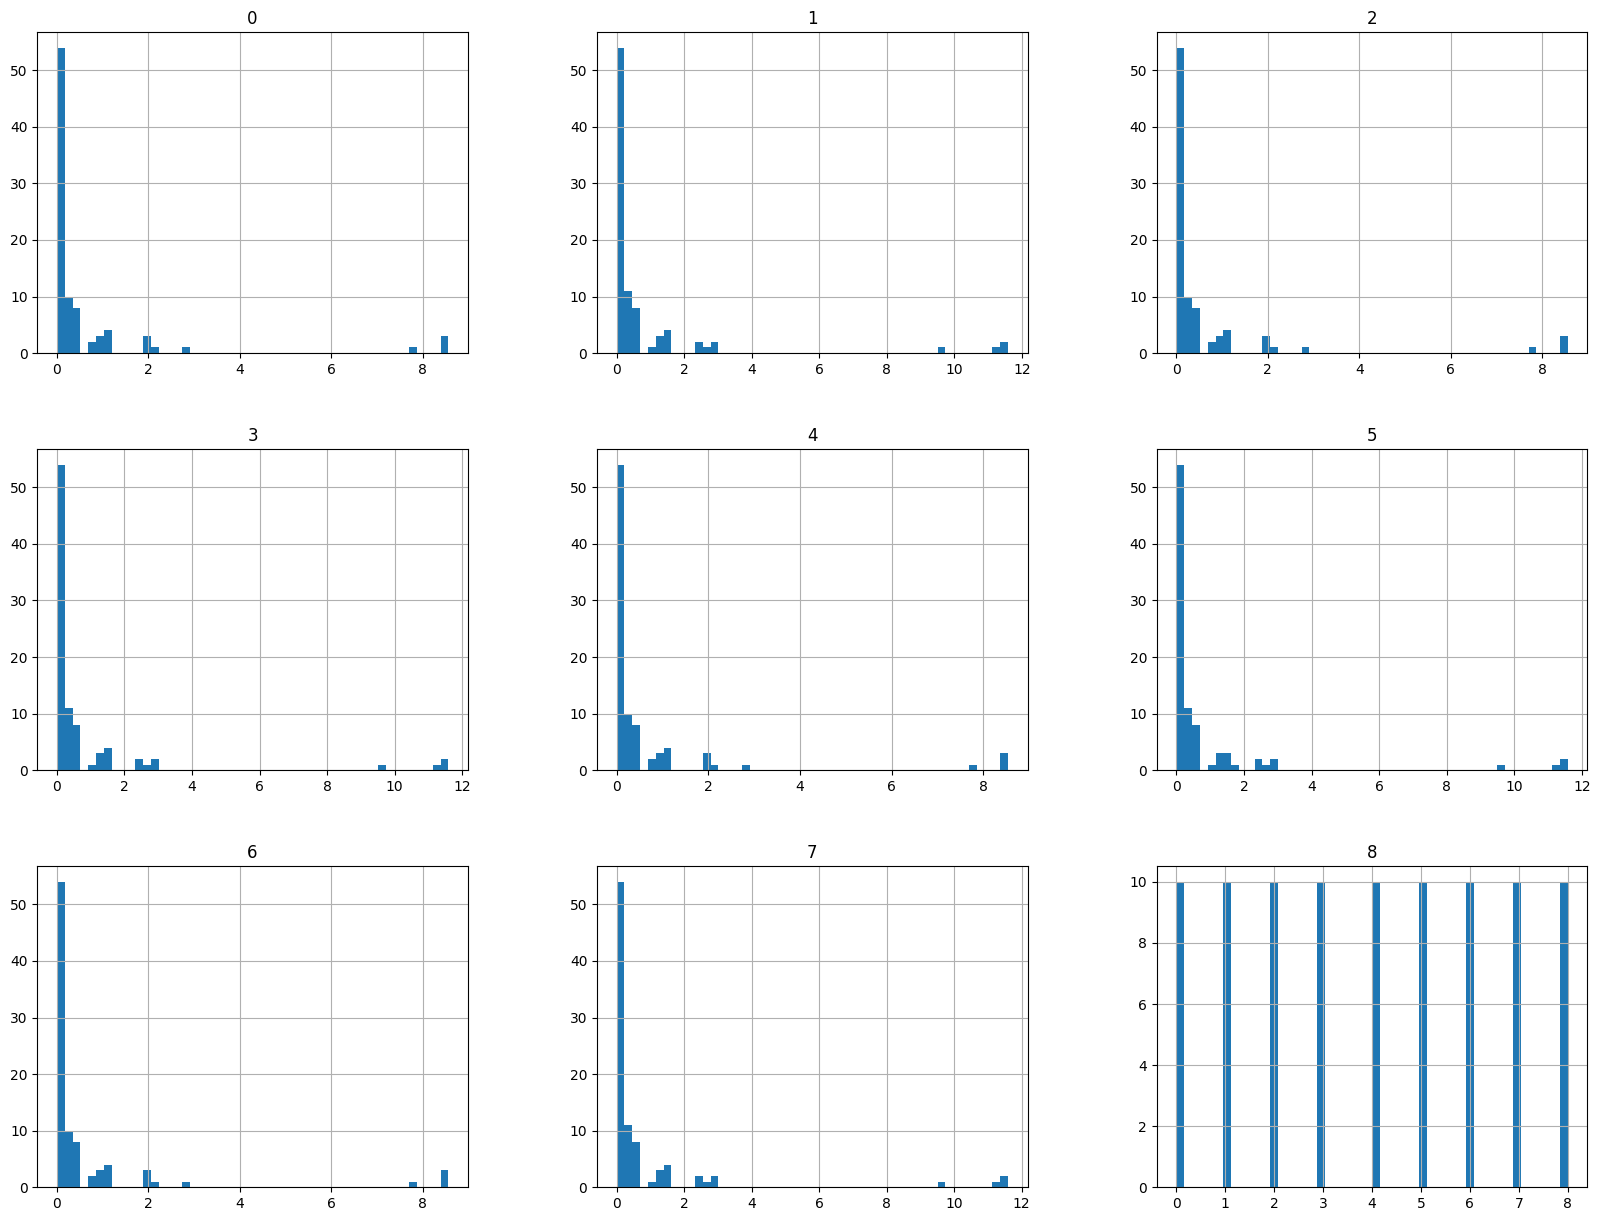

In [6]:
# %matplotlib inline   # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
train_data = df.iloc[:, :8].values  # 前八列
train_label = df.iloc[:, 8].values  # 第九列

## 交叉验证

## SVM KNN 决策树 逻辑回归 朴素贝叶斯

1、决策树

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
def  display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

import warnings
warnings.filterwarnings("ignore")

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data, train_label)

scores = cross_val_score(tree_reg, train_data, train_label,
                         scoring="accuracy", cv=10)
display_scores(scores)

precision = cross_val_score(tree_reg,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(tree_reg,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(tree_reg,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.         0.         0.11111111 0.66666667 0.33333333 0.44444444
 0.33333333 0.44444444 0.33333333 0.33333333]
Mean:  0.3
Standard deviation:  0.1990719207463213
Precision =  69.81481 %
Recall =  33.33333 %
F1 =  42.10582 %


In [15]:
# 预测
test_data=np.array([[0.121403, 0.173697, 0.0518574, 0.03407, 0.000202,
                     0.000812, 0.025659, 0.055375]])
predict_result=tree_reg.predict(test_data)
print(predict_result)
print("分类结果：{}".format([predict_result]))

[0.]
分类结果：[array([0.])]


2、SVM

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# svm_clf = SVC(C=10, decision_function_shape='ovr', kernel='rbf')
svm_clf = SVC()
scores = cross_val_score(svm_clf, train_data, train_label,cv=10)
display_scores(scores)

precision = cross_val_score(svm_clf,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(svm_clf,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(svm_clf,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.44444444 0.22222222 0.22222222 0.22222222 0.22222222 0.44444444
 0.22222222 0.22222222 0.22222222 0.22222222]
Mean:  0.2666666666666667
Standard deviation:  0.08888888888888889
Precision =  16.96296 %
Recall =  26.66667 %
F1 =  18.88889 %


3、KNN

In [18]:
# https://blog.csdn.net/qq_29367075/article/details/113419562
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier  

# k_range = range(1, 31)

knn = KNeighborsClassifier()  # knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
scores = cross_val_score(knn, train_data, train_label,cv=10,scoring='accuracy')  
display_scores(scores)

precision = cross_val_score(knn,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(knn,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(knn,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.33333333 0.11111111 0.11111111 0.11111111 0.11111111 0.33333333
 0.11111111 0.11111111 0.11111111 0.11111111]
Mean:  0.15555555555555556
Standard deviation:  0.08888888888888889
Precision =  6.66667 %
Recall =  15.55556 %
F1 =  8.14815 %


4、逻辑回归

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(
        n_splits=3,
        random_state=42,     # 设置随机种子
        shuffle=True
    )

lr = LogisticRegression()
# train_label = train_label.astype('float')
# lr_result = lr.fit(train_data, train_label)
# lr.predict(X)

accuracy = cross_val_score(lr, train_data, train_label, cv=10, scoring='accuracy')

display_scores(accuracy)

precision = cross_val_score(lr,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(lr,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(lr,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.22222222 0.22222222 0.22222222 0.22222222]
Mean:  0.15555555555555559
Standard deviation:  0.05443310539518173
Precision =  7.33333 %
Recall =  15.55556 %
F1 =  8.88889 %


5、朴素贝叶斯

In [20]:
# from sklearn.model_selection import cross_val_score 
# import numpy as np
# from sklearn.naive_bayes import GaussianNB

# gaussiannb_classifier = GaussianNB()
# gaussiannb_classifier.fit(train_data, train_label)

# accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label, scoring='accuracy',cv=10)
# display_scores(accuracy)

# precision = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='precision_weighted',cv=10)
# print("Precision = ",round(100*precision.mean(),5),'%')

# recall = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='recall_weighted',cv=10)
# print("Recall = ",round(100*recall.mean(),5),'%')

# F1 = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='f1_weighted',cv=10)
# print("F1 = ",round(100*F1.mean(),5),'%')

from sklearn.model_selection import cross_val_score 
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

gaussiannb_classifier = MultinomialNB(alpha=1.0)
gaussiannb_classifier.fit(train_data, train_label)

# param_grid ={}
# param_grid['alpha'] = [100]

accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
display_scores(accuracy)

# param_grid ={}

# param_grid['alpha'] = [100]

# model = MultinomialNB()

# grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

# grid_result = grid.fit(train_data, train_label)

# print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))



Scores:  [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.11111111]
Mean:  0.11111111111111112
Standard deviation:  1.3877787807814457e-17


In [21]:
from sklearn.model_selection import cross_val_score 
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussiannb_classifier = GaussianNB()
gaussiannb_classifier.fit(train_data, train_label)

# accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
# display_scores(accuracy)

# param_grid ={}

# param_grid['alpha'] = [0.001,0.01,0.1,1.5]

# model = MultinomialNB()

# grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
display_scores(accuracy)

param_grid ={}

param_grid['alpha'] = [0.001,0.01,0.1,1.5]

model = MultinomialNB()

grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

grid_result = grid.fit(train_data, train_label)

print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))


Scores:  [0.22222222 0.55555556 0.55555556 0.55555556 0.55555556 0.22222222
 0.77777778 0.77777778 0.77777778 0.77777778]
Mean:  0.5777777777777777
Standard deviation:  0.20367003088692623
最优：0.11111111111111112 使用{'alpha': 0.001}
